In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('cars_data.csv')

In [59]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",3.5,6.0,225,18,24,3880,115,197


In [60]:
df.shape

(428, 14)

In [61]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [62]:
df = df.dropna()

In [63]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [64]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [65]:
df['MSRP'].head(2)

0    $36,945
1    $23,820
Name: MSRP, dtype: object

In [66]:
df['MSRP'] = df['MSRP'].str.replace('$', '')
df['MSRP'] = df['MSRP'].str.replace(',','')
df['MSRP'] = df['MSRP'].astype('int')

In [67]:
df['MSRP'].head()

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: int32

In [68]:
df.shape

(426, 14)

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [70]:
pip show jupyterthemes

Name: jupyterthemes
Version: 0.20.0
Summary: Select and install a Jupyter notebook theme
Home-page: https://github.com/dunovank/jupyter-themes
Author: dunovank
Author-email: dunovank@gmail.com
License: MIT
Location: C:\Python312\Lib\site-packages
Requires: ipython, jupyter-core, lesscpy, matplotlib, notebook
Required-by: 
Note: you may need to restart the kernel to use updated packages.


<Figure size 1500x1500 with 0 Axes>

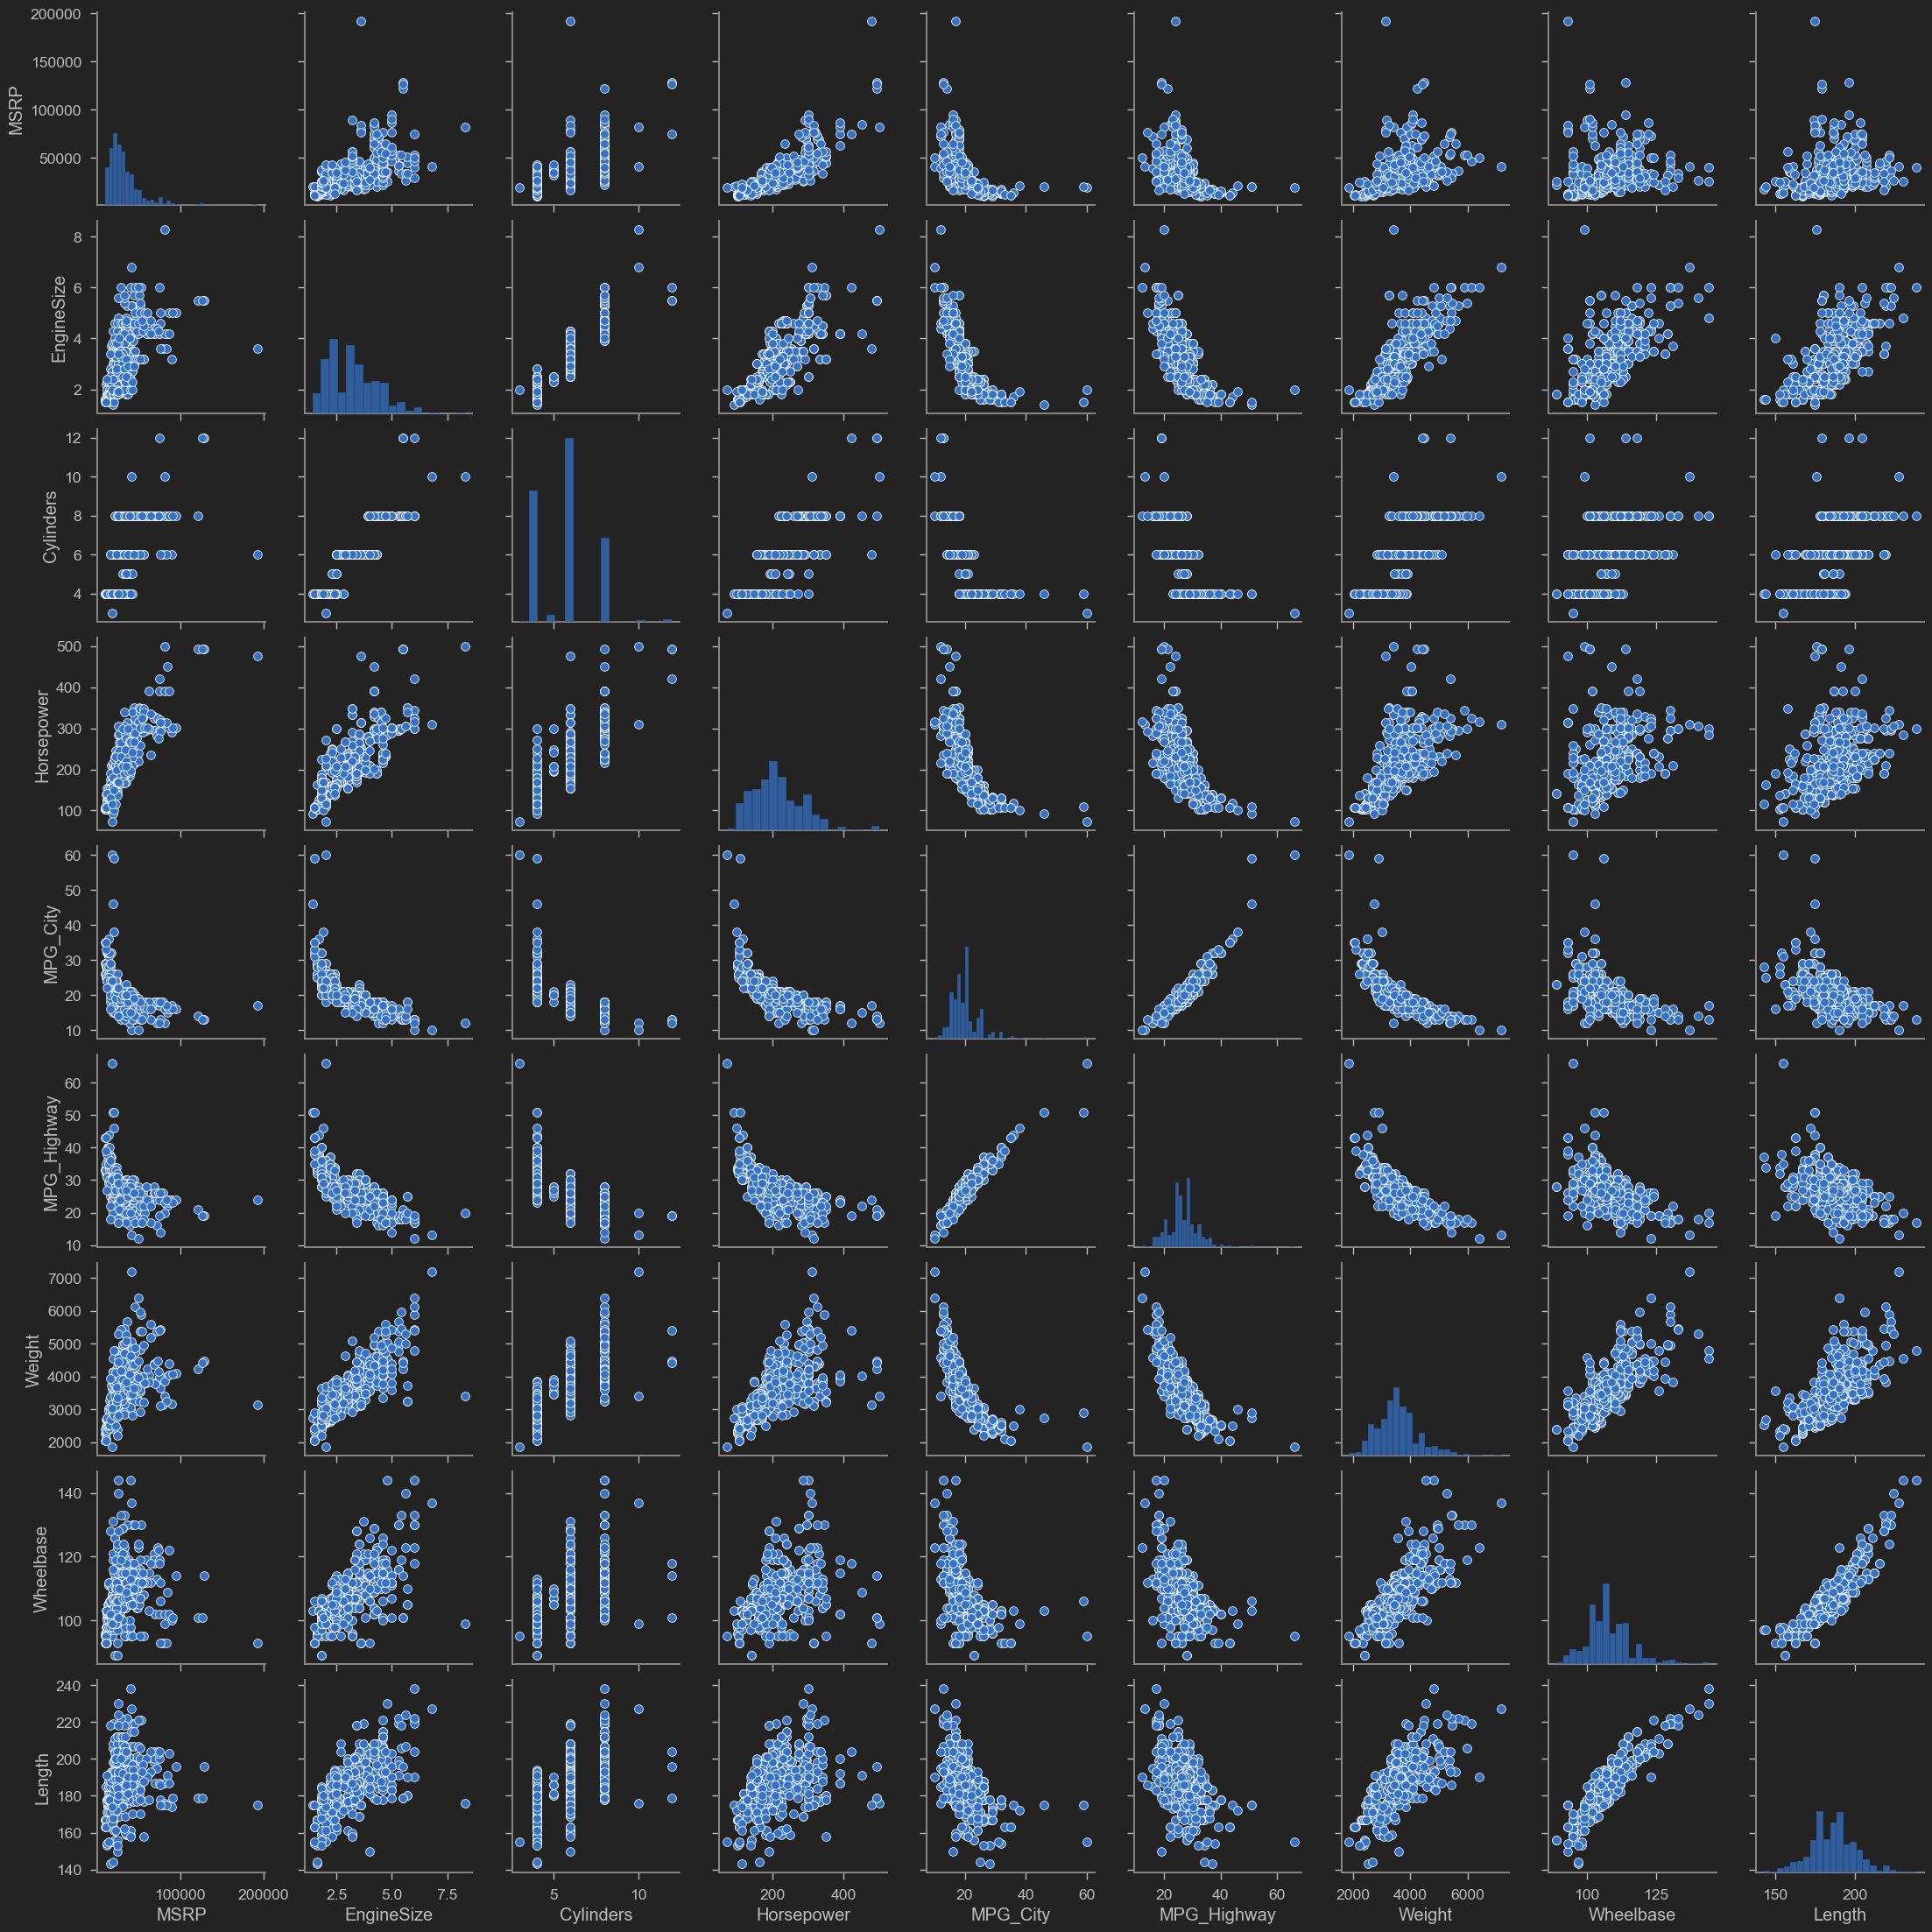

In [77]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

In [72]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [73]:
df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [74]:
fig = px.histogram(df, x = 'Make', 
                  labels= {'Make': 'Manufacturer'},
                  title = 'Manufacturer of the car',
                  color_discrete_sequence=['red'])
fig.show()

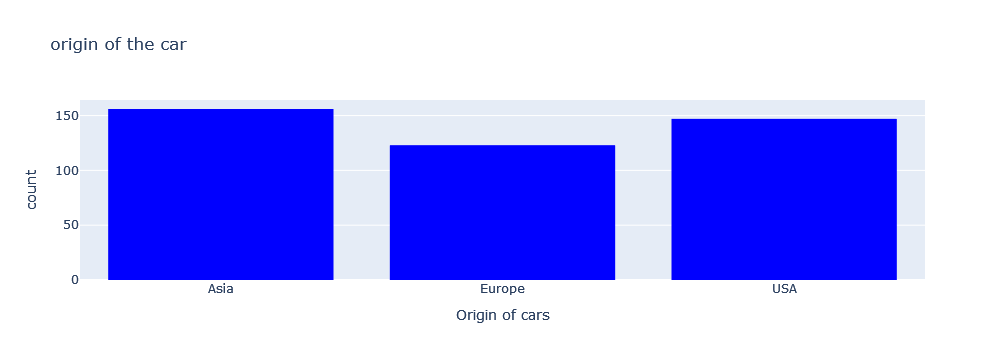

In [79]:
fig = px.histogram(df, x = 'Origin', 
                  labels= {'Origin': 'Origin of cars'},
                  title = 'origin of the car',
                  color_discrete_sequence=['blue'])
fig.show()

In [82]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int32
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [83]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [85]:
df_new = pd.get_dummies(df, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])

In [86]:
df_new.shape

(426, 482)

In [87]:
df_new.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,True,...,False,False,False,False,True,False,False,True,False,False
1,23820,2.0,4.0,200,24,31,2778,101,172,True,...,True,False,False,False,True,False,False,False,True,False
2,26990,2.4,4.0,200,22,29,3230,105,183,True,...,True,False,False,False,True,False,False,False,True,False
3,33195,3.2,6.0,270,20,28,3575,108,186,True,...,True,False,False,False,True,False,False,False,True,False
4,43755,3.5,6.0,225,18,24,3880,115,197,True,...,True,False,False,False,True,False,False,False,True,False


In [88]:
X = df_new.drop('MSRP', axis=1)
y = df_new['MSRP']

In [89]:
x = np.array(X)
y = np.array(y)


In [90]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

In [99]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_model.score(x_test,y_test)

0.7887290652044137

# Decision Tree Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
dec_model = DecisionTreeRegressor()
dec_model.fit(x_train, y_train)
dec_model.score(x_test, y_test)

0.5241377616665922

# Random Forest Regression

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)
random_model.score(x_test, y_test)

0.5906657219386091

# XGBoost Regression

In [110]:
from xgboost import XGBRegressor

In [111]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_model.score(x_test, y_test)

0.6681568622589111